# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.

len(combined_data['Mouse ID'].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = combined_data.duplicated("Timepoint")

duplicate_mouse


0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = combined_data.loc[(combined_data["Mouse ID"] == 'g989')]

duplicate_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined = combined_data.loc[(combined_data["Mouse ID"] != 'g989')]

clean_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.


len(clean_combined['Mouse ID'].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# regimen

tumor_regimen = clean_combined.groupby("Drug Regimen")

#mean

tumor_mean = clean_combined.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#median

tumor_median = clean_combined.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

#variance

tumor_var = clean_combined.groupby('Drug Regimen').var()['Tumor Volume (mm3)']


# Stand Dev

tumor_std = clean_combined.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

# SEM

tumor_sem = clean_combined.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


tumor_sem

# DataFrame

regimen_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                 "Median Tumor Volume": tumor_median,
                                  "Tumor Volume Variance": tumor_var,
                                  "Tumor Volume Std. Dev.": tumor_std,
                                  "Tumor Volume Std. Err.": tumor_sem})

regimen_summary




/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_28923/3051640116.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = clean_combined.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_28923/3051640116.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median = clean_combined.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
/var/folders/br/p0w3y3qn03dcsbdlblfvjywc0000gn/T/ipykernel_28923/3051640116.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future versi

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

numpyDrug = tumor_regimen["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
numpyDrug

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

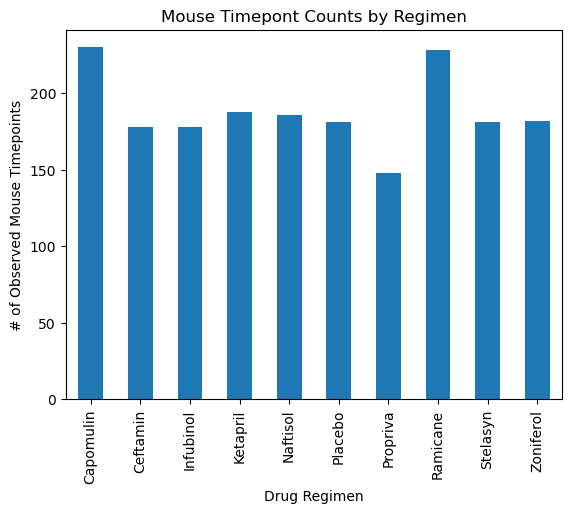

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_timepoints = clean_combined.groupby('Drug Regimen')

rt_counts = regimen_timepoints['Timepoint'].count()

rt_counts

rt_chart = rt_counts.plot(kind = 'bar',
                         xlabel = 'Drug Regimen',
                         ylabel = '# of Observed Mouse Timepoints',
                         title = 'Mouse Timepont Counts by Regimen')

plt.show()


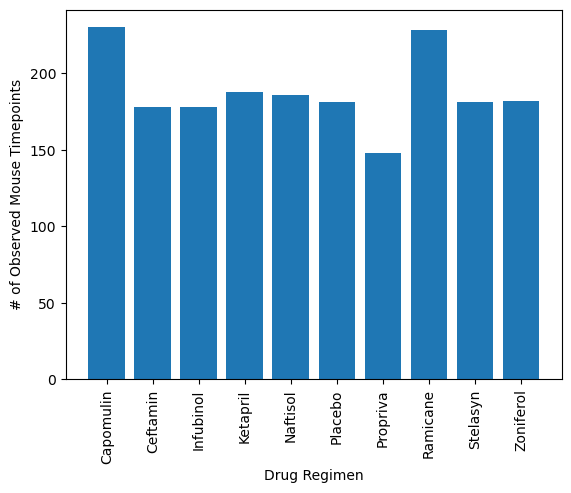

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
         'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(drugs, rt_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 'vertical')

plt.show()


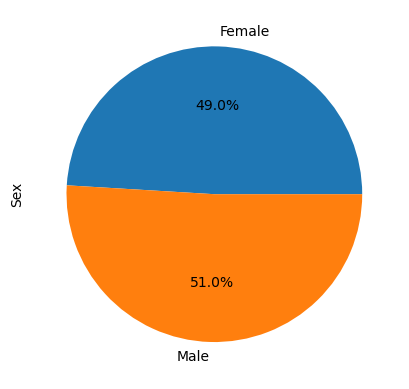

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sexes = clean_combined.groupby('Sex')

sex_count = sexes['Sex'].count()

sex_count


rt_pie = sex_count.plot(kind = 'pie', y = 'Sex', autopct="%1.1f%%")

plt.show()

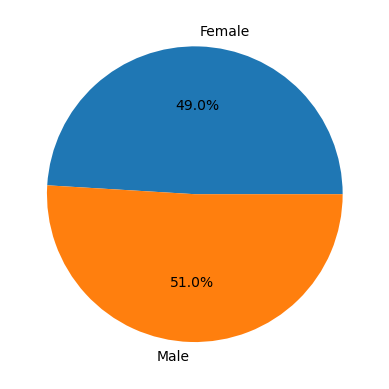

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Female", "Male"]

plt.pie(sex_count, labels=sex,
        autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers, and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

reduced_data = clean_combined.loc[((clean_combined["Drug Regimen"] =="Capomulin")|(clean_combined["Drug Regimen"] =="Ramicane")|(clean_combined["Drug Regimen"] =="Infubinol")|(clean_combined["Drug Regimen"] =="Ceftamin"))]
id_regimen = reduced_data.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse

max_time = pd.DataFrame(id_regimen["Timepoint"].max())


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_results = pd.merge(max_time, clean_combined, on = ["Mouse ID","Timepoint"])
final_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = final_results["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)

drug_dict = {list:[] for list in treatments}


for treatment in treatments:
    
    treatment_name = str(treatment)
    treatment_df = final_results.loc[(final_results["Drug Regimen"]==str(treatment)),"Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = treatment_df.quantile([.25,.5,.75])    
    iqr = quartile[0.75] - quartile[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartile[.25] - (1.5 * iqr )
    upper_bound = quartile[0.75] + (1.5 * iqr)
    outliers = treatment_df.loc[((treatment_df<lower_bound)  
                            | (treatment_df>upper_bound))]
    
    #print outliers, if any
    print("--------------------------------")
    print(f"**{str(treatment_name)} potential outliers: {outliers}")
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for i in treatment_df:
        drug_dict[treatment_name].append(i)
    


--------------------------------
**Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------
**Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
**Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
**Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


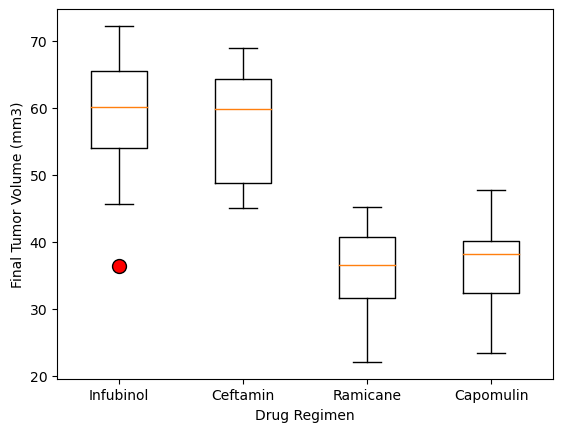

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1,ax1= plt.subplots()
flierprops = dict(markerfacecolor = "red", markersize = 10)
ax1.boxplot([drug_dict[x]for x in drug_dict], labels = treatments, flierprops = flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
plt.show() 


## Line and Scatter Plots

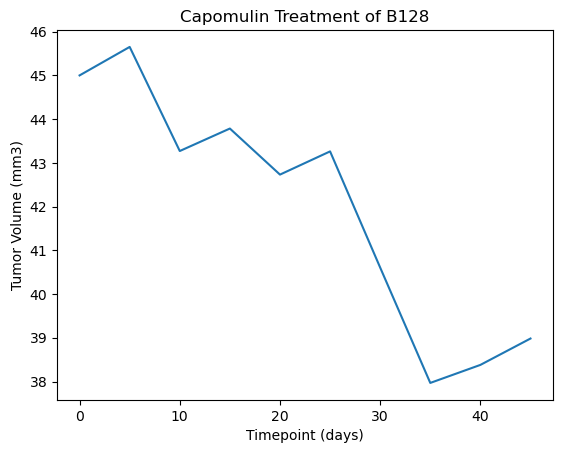

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


cap_b128 = clean_combined.loc[(combined_data["Mouse ID"] == 'b128')]

cap_b128

timepoint = cap_b128["Timepoint"]


tumor_vol = cap_b128["Tumor Volume (mm3)"]


plt.title("Capomulin Treatment of B128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(timepoint, tumor_vol)

plt.show()

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_regimen = clean_combined.loc[(clean_combined["Drug Regimen"] == 'Capomulin')]

cap_regimen



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25
